In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [3]:
data1 = './datasets/Kindergarten_Immunization_Data__2016-17.csv'

data2= './datasets/CFR_Vaccine_Map.xlsx'

data3 = './datasets/Added Source information for vaccine map - Sheet1.csv'

In [4]:
df_Kinder_Washi_Immu = pd.read_csv(data1)
df_Kinder_Washi_Immu.head()
df_Kinder_Washi_Immu.corr()

,Reported_enrollment,Number_complete_for_all_immunizations,Number_conditional,Number_out_of_compliance,Number_with_any_exemption,Number_with_medical_exemption,Number_with_personal_exemption,Number_with_religious_exemption,Number_with_religious_membership_exemption,Number_incomplete_for_diphtheria_tetanus,Number_incomplete_for_pertussis,Number_incomplete_for_measles_mumps_rubella,Number_incomplete_for_polio,Number_incomplete_for_HepatitisB,Number_incomplete_for_varicella,Has_kindergarten,Has_6thGrade
Reported_enrollment,1.000000,0.985764,0.395896,0.483171,0.582021,0.408498,0.519568,0.233208,0.154059,0.599118,0.585248,0.594493,0.598538,0.586286,0.620363,0.657180,-0.174878
Number_complete_for_all_immunizations,0.985764,1.000000,0.357375,0.345596,0.535053,0.388583,0.472707,0.219594,0.138629,0.466311,0.457138,0.461234,0.463133,0.465059,0.489349,0.634217,-0.174169
Number_conditional,0.395896,0.357375,1.000000,0.114147,0.322178,0.197005,0.294472,0.143309,0.096753,0.372904,0.365461,0.339680,0.335246,0.302945,0.376596,0.324124,0.009491
Number_out_of_compliance,0.483171,0.345596,0.114147,1.000000,0.204326,0.132446,0.186811,0.072179,0.061127,0.868901,0.834302,0.869020,0.888672,0.779087,0.852145,0.334050,-0.123910
Number_with_any_exemption,0.582021,0.535053,0.322178,0.204326,1.000000,0.569763,0.944658,0.344405,0.280619,0.512458,0.513800,0.531470,0.522132,0.600352,0.566736,0.485584,-0.030385
Number_with_medical_exemption,0.408498,0.388583,0.197005,0.132446,0.569763,1.000000,0.309772,0.183719,0.080205,0.294170,0.296836,0.298749,0.296278,0.314329,0.326811,0.303801,-0.043943
Number_with_personal_exemption,0.519568,0.472707,0.294472,0.186811,0.944658,0.309772,1.000000,0.217425,0.217270,0.476786,0.477233,0.497547,0.490073,0.574140,0.530676,0.447534,-0.022489
Number_with_religious_exemption,0.233208,0.219594,0.143309,0.072179,0.344405,0.183719,0.217425,1.000000,0.157202,0.201791,0.203017,0.201161,0.188585,0.219358,0.205228,0.187883,0.014128
Number_with_religious_membership_exemption,0.154059,0.138629,0.096753,0.061127,0.280619,0.080205,0.217270,0.157202,1.000000,0.158819,0.160390,0.163432,0.161519,0.183986,0.172076,0.117279,0.000431
Number_incomplete_for_diphtheria_tetanus,0.599118,0.466311,0.372904,0.868901,0.512458,0.294170,0.476786,0.201791,0.158819,1.000000,0.973061,0.974305,0.974168,0.913568,0.963718,0.451575,-0.094930


In [5]:
df_Vaccine_Preven_Map = pd.read_excel(data2)
df_Vaccine_Preven_Map.head(10)
df_Vaccine_Preven_Map.loc[df_Vaccine_Preven_Map['Impact Scale']=='Secondary', :]
#df_Vaccine_Preven_Map.iloc[1187,-1]


,Category,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale,Source Citation,Source
36,Measles,Measles,Australia (Queensland),Australia,-24.917574,145.902796,9/2010,2010,2,0,Secondary,"Bedo, Stephanie. ""Coast measles outbreak spark...",http://www.goldcoast.com.au/article/2011/03/21...
37,Measles,Measles,Australia (Western Australia),Australia,-27.672817,121.62831,6/2010,2010,2,0,Secondary,"ABC News (Queensland), ""Alert issued over poss...",http://www.abc.net.au/news/stories/2010/06/07/...
41,Measles,Measles,Australia (Brisbane),Australia,-27.471010,153.02345,1/2011,2011,3,0,Secondary,Notes from the Field : Multiple Cases of Measl...,http://www.cdc.gov/mmwr/preview/mmwrhtml/mm602...
46,Measles,Measles,Australia (South Australia),Australia,-30.000232,136.209155,8/2011,2011,2,0,Secondary,"Pengelley, Jill. ""New measles cases prompt war...",http://www.adelaidenow.com.au/news/south-austr...
48,Measles,Measles,Australia (Victoria),Australia,-35.471308,144.785153,4/2011,2011,4,0,Secondary,"ABC News (Queensland), ""Health department issu...",http://www.abc.net.au/news/2011-04-16/health-d...
50,Other,Diphtheria,Australia (Brisbane),Australia,-27.469771,153.025124,5/2011,2011,1,1,Secondary,"Herald Sun. ""Diphtheria case 'shocking': AMA.""...",http://www.heraldsun.com.au/news/breaking-news...
51,Measles,Measles,Australia (Adelaide),Australia,-37.964430,145.05598,2/2012,2012,2,0,Secondary,"Seven News Adelaide. ""Alert issued over 2nd me...",http://au.news.yahoo.com/latest/a/-/latest/128...
80,Measles,Measles,Australia (Adelaide),Australia,-34.928620,138.59996,12/2015,2015,1,0,Secondary,"9 News.""Measles alert issued after confirmed c...",http://www.9news.com.au/health/2015/12/08/01/5...
83,Measles,Measles,Australia (New South Wales),Australia,-28.236960,153.5098,12/2015,2015,2,0,Secondary,"St. Mary's Star. ""NSW Health warns of measles ...",http://www.stmarysstar.com.au/story/3597825/ns...
92,Measles,Measles,Australia (South Australia),Australia,-30.000232,136.209155,9/2016,2016,2,0,Secondary,"9News, ""Two new cases of measles detected in S...",http://www.9news.com.au/national/2016/09/09/16...


In [6]:
df_Vaccine_Preven_Map.describe()

,Lat,Cases,Fatalities
count,1587.000000,1587.000000,1587.000000
mean,25.209371,1136.880907,7.849401
std,24.843414,7112.530325,78.277133
min,-45.802010,0.000000,0.000000
25%,10.961851,1.000000,0.000000
50%,33.312810,10.000000,0.000000
75%,42.651792,98.000000,0.000000
max,70.299771,134042.000000,2023.000000


In [7]:
df_Vaccine_Preven_Map.corr()

,Lat,Cases,Fatalities
Lat,1.000000,-0.055026,-0.076850
Cases,-0.055026,1.000000,0.388541
Fatalities,-0.076850,0.388541,1.000000


In [8]:
df_Vaccine_Preven_Map.iloc[121,3] = 'Europe'

In [9]:
df_Vaccine_Preven_Map['Continent'].value_counts()

North America    449
Asia             426
Africa           274
Europe           272
Australia        120
South America     33
Asia              10
Australia          1
Africa             1
Oceania            1
Name: Continent, dtype: int64

In [10]:
df_Vaccine_Preven_Map.columns

Index([u'Category', u'Outbreak', u'Location', u'Continent', u'Lat', u'Long',
       u'Date', u'Year', u'Cases', u'Fatalities', u'Impact Scale',
       u'Source Citation', u'Source'],
      dtype='object')

In [11]:
df_Vaccine_Preven_Map.isnull().sum()

Category            0
Outbreak            0
Location            0
Continent           0
Lat                 0
Long                0
Date                0
Year                0
Cases               0
Fatalities          0
Impact Scale       82
Source Citation     0
Source              3
dtype: int64

In [12]:
df_Vaccine_Preven_Map.groupby('Category').count()

,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale,Source Citation,Source
Category,,,,,,,,,,,,
Attacks,318,318,318,318,318,318,318,318,318,237,318,318
Attacks,3,3,3,3,3,3,3,3,3,3,3,3
Measles,740,740,740,740,740,740,740,740,740,739,740,738
Mumps,114,114,114,114,114,114,114,114,114,114,114,114
Other,102,102,102,102,102,102,102,102,102,102,102,102
Polio,76,76,76,76,76,76,76,76,76,76,76,76
Rubella,25,25,25,25,25,25,25,25,25,25,25,25
Whooping Cough,209,209,209,209,209,209,209,209,209,209,209,208


In [13]:
df_Vaccine_Preven_Map.groupby('Category').describe()

Cases                                                      \
                count         mean           std  min   25%   50%     75%   
Category                                                                    
Attacks         318.0     1.094340      3.230947  0.0  0.00   0.0    1.00   
Attacks           3.0     0.000000      0.000000  0.0  0.00   0.0    0.00   
Measles         740.0  2007.966216  10102.843146  0.0  3.00  21.5  276.25   
Mumps           114.0   373.438596   1695.336529  1.0  6.25  20.5  104.00   
Other           102.0   594.049020   1989.985872  0.0  2.00  15.0  206.25   
Polio            76.0    35.486842     73.640477  1.0  3.00   6.5   26.00   
Rubella          25.0  3319.440000   9089.069406  1.0  6.00  18.0  100.00   
Whooping Cough  209.0   617.889952   1908.184682  1.0  9.00  44.0  247.00   

                         Fatalities                                        \
                     max      count       mean         std  min  25%  50%   
Category                                                                    
Attacks             34.0      318.0   0.610063    2.009165  0.0  0.0  0.0   
Attacks              0.0        3.0   0.000000    0.000000  0.0  0.0  0.0   
Measles         134042.0      740.0  10.663514   97.878506  0.0  0.0  0.0   
Mumps            16352.0      114.0   0.000000    0.000000  0.0  0.0  0.0   
Other            14473.0      102.0  39.882353  156.538060  0.0  0.0  0.0   
Polio              430.0       76.0   1.381579    9.961214  0.0  0.0  0.0   
Rubella          39122.0       25.0   2.000000    9.591663  0.0  0.0  0.0   
Whooping Cough   13167.0      209.0   0.712919    3.932590  0.0  0.0  0.0   

                               Lat                                   \
                75%     max  count       mean        std        min   
Category                                                              
Attacks         0.0    16.0  318.0  26.432885  13.026998 -30.000232   
Attacks         0.0     0.0    3.0  20.021649  12.118694  12.971599   
Measles         0.0  2023.0  740.0  23.102263  28.286069 -45.802010   
Mumps           0.0     0.0  114.0  37.883842  19.976881 -36.848460   
Other           5.0  1155.0  102.0  18.269769  24.622352 -36.848460   
Polio           0.0    85.0   76.0  16.810264  16.056026 -20.937637   
Rubella         0.0    48.0   25.0  27.817801  28.323743 -39.848460   
Whooping Cough  0.0    50.0  209.0  30.098448  26.943312 -45.282800   

                                                            
                      25%        50%        75%        max  
Category                                                    
Attacks         24.861460  30.382361  34.014970  52.130700  
Attacks         13.024985  13.078372  23.546674  34.014975  
Measles          6.515187  33.717810  45.062508  68.993070  
Mumps           35.868225  42.250743  50.691781  61.218056  
Other            2.698421  18.853440  38.640227  60.128160  
Polio            6.797378  16.863376  30.992334  61.524010  
Rubella         22.820300  37.996160  49.839683  60.413850  
Whooping Cough  33.240560  39.891210  44.383580  70.299771

In [14]:
df_Vaccine_Preven_Map.groupby('Category').corr()

Cases  Fatalities       Lat
Category                                                 
Attacks        Cases       1.000000    0.767661  0.020778
               Fatalities  0.767661    1.000000 -0.003618
               Lat         0.020778   -0.003618  1.000000
Attacks        Cases            NaN         NaN       NaN
               Fatalities       NaN         NaN       NaN
               Lat              NaN         NaN  1.000000
Measles        Cases       1.000000    0.430957 -0.063526
               Fatalities  0.430957    1.000000 -0.072886
               Lat        -0.063526   -0.072886  1.000000
Mumps          Cases       1.000000         NaN  0.017663
               Fatalities       NaN         NaN       NaN
               Lat         0.017663         NaN  1.000000
Other          Cases       1.000000    0.759641 -0.111202
               Fatalities  0.759641    1.000000 -0.102140
               Lat        -0.111202   -0.102140  1.000000
Polio          Cases       1.000000    0.365127  0.138504
               Fatalities  0.365127    1.000000 -0.085672
               Lat         0.138504   -0.085672  1.000000
Rubella        Cases       1.000000   -0.077030  0.283318
               Fatalities -0.077030    1.000000 -0.024059
               Lat         0.283318   -0.024059  1.000000
Whooping Cough Cases       1.000000    0.022112 -0.102791
               Fatalities  0.022112    1.000000 -0.103551
               Lat        -0.102791   -0.103551  1.000000

In [15]:
df_Vaccine_Preven_Map['Category'].value_counts()
#two attacks Measles, Whooping Cough

Measles           740
Attacks           318
Whooping Cough    209
Mumps             114
Other             102
Polio              76
Rubella            25
Attacks             3
Name: Category, dtype: int64

In [16]:
# some of the attacks are just hits on headlines
df_Vaccine_Preven_Map.iloc[9,:]

Category                                                     Attacks
Outbreak                                                    Violence
Location                                                 Afghanistan
Continent                                                       Asia
Lat                                                           33.934
Long                                                      67.7034312
Date                                                          3/2014
Year                                                            2014
Cases                                                              3
Fatalities                                                         3
Impact Scale                                                     NaN
Source Citation    IANS Live. "Roadside bomb kills 3 polio vaccin...
Source             http://www.ianslive.in/index.php?param=news/Ro...
Name: 9, dtype: object

In [17]:
df_Vaccine_Preven_Map.iloc[1532,1] = 'Announcement'

In [18]:
df_Vaccine_Preven_Map.iloc[1532,:]

Category                                                     Measles
Outbreak                                                Announcement
Location                                U.S. (Boston, Massachusetts)
Continent                                              North America
Lat                                                          42.3632
Long                                                      -71.068830
Date                                             2017-06-01 00:00:00
Year                                                            2017
Cases                                                              0
Fatalities                                                         0
Impact Scale                                            Announcement
Source Citation    Fearnow, Benjamin. "Study: 52 Percent of US Tr...
Source             https://www.studyfinds.org/measles-vaccination...
Name: 1532, dtype: object

In [19]:
df_Vaccine_Preven_Map.loc[df_Vaccine_Preven_Map['Cases'],:].isnull().sum()

Category           131
Outbreak           131
Location           131
Continent          131
Lat                131
Long               131
Date               131
Year               131
Cases              131
Fatalities         131
Impact Scale       191
Source Citation    131
Source             131
dtype: int64

In [20]:
df_Vaccine_Preven_Map.groupby('Location').dtypes

,Cases,Category,Continent,Date,Fatalities,Impact Scale,Lat,Long,Outbreak,Source,Source Citation,Year
Location,,,,,,,,,,,,
(U.S.) New York,int64,object,object,object,int64,object,float64,object,object,object,object,object
Afghanistan,int64,object,object,object,int64,object,float64,object,object,object,object,object
Afghanistan (Badakhshan),int64,object,object,object,int64,object,float64,object,object,object,object,object
Afghanistan (Jalalabad),int64,object,object,object,int64,object,float64,object,object,object,object,object
Afghanistan (Kandahar),int64,object,object,object,int64,object,float64,object,object,object,object,object
Afghanistan (Kunar Province),int64,object,object,object,int64,object,float64,object,object,object,object,object
Algeria (Adrar),int64,object,object,object,int64,object,float64,object,object,object,object,object
Angola,int64,object,object,object,int64,object,float64,object,object,object,object,object
Angola (Cunene),int64,object,object,object,int64,object,float64,object,object,object,object,object


In [21]:
df_Vaccine_Preven_Map[['Lat']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 1 columns):
Lat    1587 non-null float64
dtypes: float64(1)
memory usage: 12.5 KB


In [22]:
df_Vaccine_Preven_Map.describe()

,Lat,Cases,Fatalities
count,1587.000000,1587.000000,1587.000000
mean,25.209371,1136.880907,7.849401
std,24.843414,7112.530325,78.277133
min,-45.802010,0.000000,0.000000
25%,10.961851,1.000000,0.000000
50%,33.312810,10.000000,0.000000
75%,42.651792,98.000000,0.000000
max,70.299771,134042.000000,2023.000000


In [23]:
df_Vaccine_Preven_Map.dtypes
df_Vaccine_Preven_Map.columns

Index([u'Category', u'Outbreak', u'Location', u'Continent', u'Lat', u'Long',
       u'Date', u'Year', u'Cases', u'Fatalities', u'Impact Scale',
       u'Source Citation', u'Source'],
      dtype='object')

In [24]:
#test df_Vaccine_Preven_Map.loc[(df_Vaccine_Preven_Map['Continent']=='North America') & (df_Vaccine_Preven_Map['Continent']=='Europe'),:]

In [25]:
df_Na_va = df_Vaccine_Preven_Map.loc[(df_Vaccine_Preven_Map['Continent']=='North America'),:]
df_Na_va.reset_index(inplace=True)
df_Na_va.drop(['Source Citation', 'Source', 'index', 'Category'], inplace =  True, axis =1)
df_Na_va.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale
0,Mumps,Canada (Quebec),North America,51.939964,-73.549136,6/2009,2009,15,0,Cluster
1,Measles,Canada (Alberta),North America,53.933271,-116.576504,5/2010,2010,4,0,Secondary
2,Measles,Canada (British Columbia),North America,53.726668,-127.647621,3/2010,2010,78,0,Secondary
3,Measles,Canada (Ottawa),North America,47.411572,-75.698194,12/2010,2010,1,0,Isolated
4,Measles,Canada (Alberta),North America,55.933270,-117.5765,08/2011,2011,1,0,Isolated


In [26]:
df_Na_va.describe()

,Lat,Cases,Fatalities
count,449.000000,449.000000,449.000000
mean,40.859606,208.930958,0.146993
std,7.620892,1010.754601,1.195507
min,8.537981,0.000000,0.000000
25%,37.090240,1.000000,0.000000
50%,40.678178,6.000000,0.000000
75%,44.681987,32.000000,0.000000
max,70.299771,12000.000000,16.000000


In [27]:
df_Na_va.corr()

,Lat,Cases,Fatalities
Lat,1.000000,-0.066184,-0.230253
Cases,-0.066184,1.000000,0.088031
Fatalities,-0.230253,0.088031,1.000000


In [28]:
#get dummies for the types of out breaks and impact scale as well source citation, location

In [29]:
df_Na_va.groupby('Outbreak').describe()

Cases                                                     \
                count         mean          std     min      25%     50%   
Outbreak                                                                   
Announcement     24.0     0.000000     0.000000     0.0     0.00     0.0   
Chicken Pox       5.0    30.000000    42.455859     2.0     3.00     4.0   
Diphtheria        4.0    28.750000    31.805398     2.0     6.50    20.5   
H1N1 Flu          1.0     1.000000          NaN     1.0     1.00     1.0   
Hepatitis A       1.0   107.000000          NaN   107.0   107.00   107.0   
Measles         180.0    19.133333    83.025634     1.0     1.00     2.0   
Measles           1.0     1.000000          NaN     1.0     1.00     1.0   
Meningitis        1.0     5.000000          NaN     5.0     5.00     5.0   
Mumps            66.0   223.924242   846.928556     1.0     5.00    11.5   
Mumps\n           1.0    57.000000          NaN    57.0    57.00    57.0   
Rotavirus         1.0  4336.000000          NaN  4336.0  4336.00  4336.0   
Tetanus           3.0     1.666667     1.154701     1.0     1.00     1.0   
Typhoid           1.0     1.000000          NaN     1.0     1.00     1.0   
Whooping Cough  158.0   379.462025  1304.474048     1.0     6.25    27.5   
Whooping cough    2.0  5427.000000  7642.410091    23.0  2725.00  5427.0   

                                 Fatalities                                  \
                    75%      max      count       mean       std  min   25%   
Outbreak                                                                      
Announcement       0.00      0.0       24.0   0.000000  0.000000  0.0  0.00   
Chicken Pox       41.00    100.0        5.0   0.000000  0.000000  0.0  0.00   
Diphtheria        42.75     72.0        4.0  10.000000  6.976150  1.0  6.25   
H1N1 Flu           1.00      1.0        1.0   1.000000       NaN  1.0  1.00   
Hepatitis A      107.00    107.0        1.0   0.000000       NaN  0.0  0.00   
Measles            6.00    776.0      180.0   0.005556  0.074536  0.0  0.00   
Measles            1.00      1.0        1.0   0.000000       NaN  0.0  0.00   
Meningitis         5.00      5.0        1.0   2.000000       NaN  2.0  2.00   
Mumps             54.75   5311.0       66.0   0.000000  0.000000  0.0  0.00   
Mumps\n           57.00     57.0        1.0   0.000000       NaN  0.0  0.00   
Rotavirus       4336.00   4336.0        1.0   0.000000       NaN  0.0  0.00   
Tetanus            2.00      3.0        3.0   0.000000  0.000000  0.0  0.00   
Typhoid            1.00      1.0        1.0   0.000000       NaN  0.0  0.00   
Whooping Cough   118.25  12000.0      158.0   0.120253  0.760134  0.0  0.00   
Whooping cough  8129.00  10831.0        2.0   1.500000  0.707107  1.0  1.25   

                                     Lat                                  \
                 50%    75%   max  count       mean       std        min   
Outbreak                                                                   
Announcement     0.0   0.00   0.0   24.0  38.756019  5.201024  30.267153   
Chicken Pox      0.0   0.00   0.0    5.0  37.336614  5.841588  27.664827   
Diphtheria      11.5  15.25  16.0    4.0  18.818115  0.185929  18.594390   
H1N1 Flu         1.0   1.00   1.0    1.0  38.907192       NaN  38.907192   
Hepatitis A      0.0   0.00   0.0    1.0  44.314844       NaN  44.314844   
Measles          0.0   0.00   1.0  180.0  41.411169  7.738460   8.537981   
Measles          0.0   0.00   0.0    1.0  39.550051       NaN  39.550051   
Meningitis       2.0   2.00   2.0    1.0  39.550051       NaN  39.550051   
Mumps            0.0   0.00   0.0   66.0  40.031076  7.215442  13.444304   
Mumps\n          0.0   0.00   0.0    1.0  40.714353       NaN  40.714353   
Rotavirus        0.0   0.00   0.0    1.0  15.783471       NaN  15.783471   
Tetanus          0.0   0.00   0.0    3.0  42.241069  3.814133  37.839333   
Typhoid          0.0   0.00   0.0    1.0  37.769220       NaN  37.769220   
Whooping

In [30]:
df_Na_va['Outbreak'].replace('Measles ','Measles', inplace=True)
df_Na_va['Outbreak'].replace('Whooping cough','Whooping Cough', inplace=True)
df_Na_va['Outbreak'].replace("Mumps\n",'Mumps', inplace=True)
df_Na_va['Outbreak'].replace('Announcement','Announcement',inplace=True)


C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [31]:
df_Na_va.loc[df_Na_va['Outbreak']=='Measles ','Outbreak']

Series([], Name: Outbreak, dtype: object)

In [33]:
diseases = ['Announcement','Tetanus','Chicken Pox','Measles','Mumps','Rotavirus']

In [34]:
df_Na_va['Outbreak'].head()

0      Mumps
1    Measles
2    Measles
3    Measles
4    Measles
Name: Outbreak, dtype: object

In [35]:
df_dummies_outbreak = pd.get_dummies(df_Na_va['Outbreak'])
df_dummies_outbreak.head()
df_dummies_outbreak.Announcement.mean()
df_dummies_outbreak.drop('Announcement',axis = 1 , inplace=True)
df_dummies_outbreak.describe()



,Chicken Pox,Diphtheria,H1N1 Flu,Hepatitis A,Measles,Meningitis,Mumps,Rotavirus,Tetanus,Typhoid,Whooping Cough
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,0.011136,0.008909,0.002227,0.002227,0.403118,0.002227,0.149220,0.002227,0.006682,0.002227,0.356347
std,0.105054,0.094069,0.047193,0.047193,0.491071,0.047193,0.356703,0.047193,0.081558,0.047193,0.479454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df_dummies_outbreak.columns

Index([u'Chicken Pox', u'Diphtheria', u'H1N1 Flu', u'Hepatitis A', u'Measles',
       u'Meningitis', u'Mumps', u'Rotavirus', u'Tetanus', u'Typhoid',
       u'Whooping Cough'],
      dtype='object')

In [37]:
df_impact_dummies = pd.get_dummies(df_Na_va['Impact Scale'])
df_impact_dummies.head()
df_impact_dummies.columns
df_impact_dummies.drop('Whooping Cough', inplace=True, axis = 1)
df_impact_dummies.head()
df_impact_dummies.describe()
#What are the cluster, epidemic, isolated, secondary definitions
#epidemic  Epidemic refers to an increase, often sudden, 
#in the number of cases of a disease above what is normally expected in that population in that area
#clusterCluster refers to an aggregation of cases grouped in place and time that are suspected to be greater than the number expected, 
#even though the expected number may not be known.

,Announcement,Cluster,Epidemic,Isolated,Secondary
count,449.000000,449.000000,449.000000,449.000000,449.000000
mean,0.053452,0.398664,0.211581,0.233853,0.093541
std,0.225184,0.490169,0.408885,0.423752,0.291514
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df_dummies_outbreak.head()

,Chicken Pox,Diphtheria,H1N1 Flu,Hepatitis A,Measles,Meningitis,Mumps,Rotavirus,Tetanus,Typhoid,Whooping Cough
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


In [39]:
df_impact_dummies['Announcement'].mean()

0.053452115812917596

In [40]:
df_dummies_outbreak['Announcement'].mean()

KeyError: 'Announcement'

In [41]:
df = pd.concat([df_Na_va,df_dummies_outbreak,df_impact_dummies], axis=1)
df.head()

,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale,Chicken Pox,Diphtheria,H1N1 Flu,Hepatitis A,Measles,Meningitis,Mumps,Rotavirus,Tetanus,Typhoid,Whooping Cough,Announcement,Cluster,Epidemic,Isolated,Secondary
0,Mumps,Canada (Quebec),North America,51.939964,-73.549136,6/2009,2009,15,0,Cluster,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,Measles,Canada (Alberta),North America,53.933271,-116.576504,5/2010,2010,4,0,Secondary,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,Measles,Canada (British Columbia),North America,53.726668,-127.647621,3/2010,2010,78,0,Secondary,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,Measles,Canada (Ottawa),North America,47.411572,-75.698194,12/2010,2010,1,0,Isolated,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,Measles,Canada (Alberta),North America,55.933270,-117.5765,08/2011,2011,1,0,Isolated,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [42]:
df.describe()

,Lat,Cases,Fatalities,Chicken Pox,Diphtheria,H1N1 Flu,Hepatitis A,Measles,Meningitis,Mumps,Rotavirus,Tetanus,Typhoid,Whooping Cough,Announcement,Cluster,Epidemic,Isolated,Secondary
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,40.859606,208.930958,0.146993,0.011136,0.008909,0.002227,0.002227,0.403118,0.002227,0.149220,0.002227,0.006682,0.002227,0.356347,0.053452,0.398664,0.211581,0.233853,0.093541
std,7.620892,1010.754601,1.195507,0.105054,0.094069,0.047193,0.047193,0.491071,0.047193,0.356703,0.047193,0.081558,0.047193,0.479454,0.225184,0.490169,0.408885,0.423752,0.291514
min,8.537981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.090240,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.678178,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44.681987,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,70.299771,12000.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df['Long'].astype(float)

0      -73.549136
1     -116.576504
2     -127.647621
3      -75.698194
4     -117.576500
5     -113.490450
6      -85.323214
7      -75.698194
8      -73.549136
9      -73.549136
10     -73.549140
11    -106.450864
12    -123.113927
13    -122.959423
14    -113.490450
15    -126.123050
16     -73.553990
17     -66.461920
18     -88.945310
19    -106.435550
20    -135.000010
21    -123.002580
22    -127.647620
23    -114.058100
24     -79.799030
25     -79.799030
26     -65.874020
27     -80.739060
28     -63.416810
29     -75.701270
30    -106.440000
31    -114.091430
32     -79.383180
33    -116.576500
34    -121.815930
35    -114.058100
36    -111.380340
37     -79.866090
38     -98.813880
39    -123.282150
40     -79.784840
41     -79.829670
42     -81.243180
43     -75.697190
44     -64.201990
45    -106.683240
46    -106.450860
47    -122.800000
48    -112.990600
49     -97.181440
50     -98.813876
51     -66.461916
52    -106.670046
53     -81.150690
54     -80.248170
55     -79

In [44]:
for col in df.columns:
    print col

Announcement
Announcement

Outbreak
Location
Continent
Lat
Long
Date
Year
Cases
Fatalities
Impact Scale
Chicken Pox
Diphtheria
H1N1 Flu
Hepatitis A
Measles
Meningitis
Mumps
Rotavirus
Tetanus
Typhoid
Whooping Cough
Announcement
Cluster
Epidemic
Isolated
Secondary


NameError: name 'Announcement' is not defined

In [45]:
df.corr()

,Lat,Cases,Fatalities,Chicken Pox,Diphtheria,H1N1 Flu,Hepatitis A,Measles,Meningitis,Mumps,Rotavirus,Tetanus,Typhoid,Whooping Cough,Announcement,Cluster,Epidemic,Isolated,Secondary
Lat,1.000000,-0.066184,-0.230253,-0.049112,-0.274517,-0.012117,0.021445,0.058435,-0.008128,-0.045021,-0.155632,0.014884,-0.019180,0.083664,-0.065667,-0.075859,0.077531,0.032062,0.013438
Cases,-0.066184,1.000000,0.088031,-0.018807,-0.016920,-0.009730,-0.004770,-0.154572,-0.009543,0.005186,0.193126,-0.016837,-0.009730,0.172175,-0.049176,-0.152721,0.378284,-0.113615,-0.064469
Fatalities,-0.230253,0.088031,1.000000,-0.013062,0.782259,0.033748,-0.005816,-0.097356,0.073311,-0.051551,-0.005816,-0.010095,-0.005816,-0.005915,-0.029251,0.059758,0.000163,-0.037163,-0.020327
Chicken Pox,-0.049112,-0.018807,-0.013062,1.000000,-0.010061,-0.005014,-0.005014,-0.087210,-0.005014,-0.044443,-0.005014,-0.008703,-0.005014,-0.078960,-0.025218,0.043637,0.048955,-0.058629,-0.034090
Diphtheria,-0.274517,-0.016920,0.782259,-0.010061,1.000000,-0.004479,-0.004479,-0.077915,-0.004479,-0.039706,-0.004479,-0.007776,-0.004479,-0.070544,-0.022530,0.068032,-0.049115,-0.052380,0.050942
H1N1 Flu,-0.012117,-0.009730,0.033748,-0.005014,-0.004479,1.000000,-0.002232,-0.038827,-0.002232,-0.019786,-0.002232,-0.003875,-0.002232,-0.035154,-0.011227,-0.038469,-0.024475,0.085516,-0.015177
Hepatitis A,0.021445,-0.004770,-0.005816,-0.005014,-0.004479,-0.002232,1.000000,-0.038827,-0.002232,-0.019786,-0.002232,-0.003875,-0.002232,-0.035154,-0.011227,-0.038469,0.091201,-0.026102,-0.015177
Measles,0.058435,-0.154572,-0.097356,-0.087210,-0.077915,-0.038827,-0.038827,1.000000,-0.038827,-0.344174,-0.038827,-0.067401,-0.038827,-0.611481,-0.195291,-0.186931,-0.303444,0.425556,0.281743
Meningitis,-0.008128,-0.009543,0.073311,-0.005014,-0.004479,-0.002232,-0.002232,-0.038827,1.000000,-0.019786,-0.002232,-0.003875,-0.002232,-0.035154,-0.011227,-0.038469,-0.024475,-0.026102,0.147073
Mumps,-0.045021,0.005186,-0.051551,-0.044443,-0.039706,-0.019786,-0.019786,-0.344174,-0.019786,1.000000,-0.019786,-0.034348,-0.019786,-0.311614,-0.099521,0.207959,0.027916,-0.157541,-0.070136


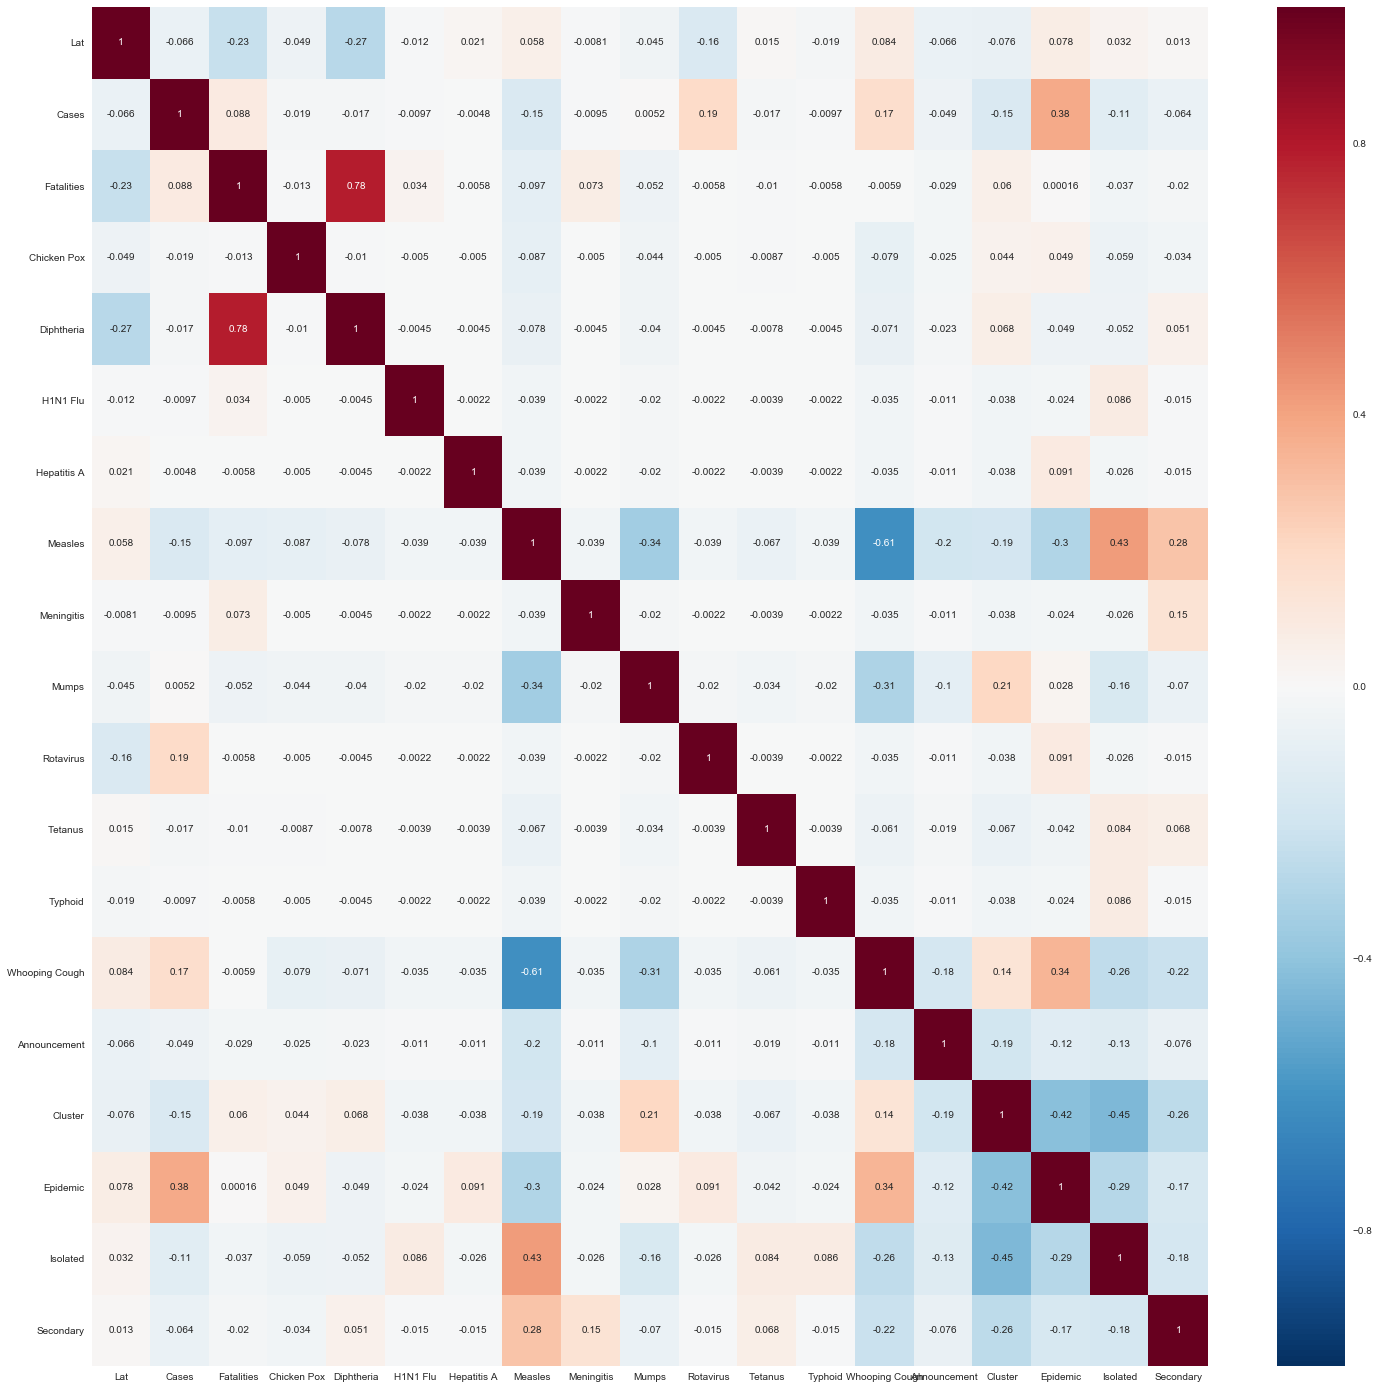

In [336]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot=True)

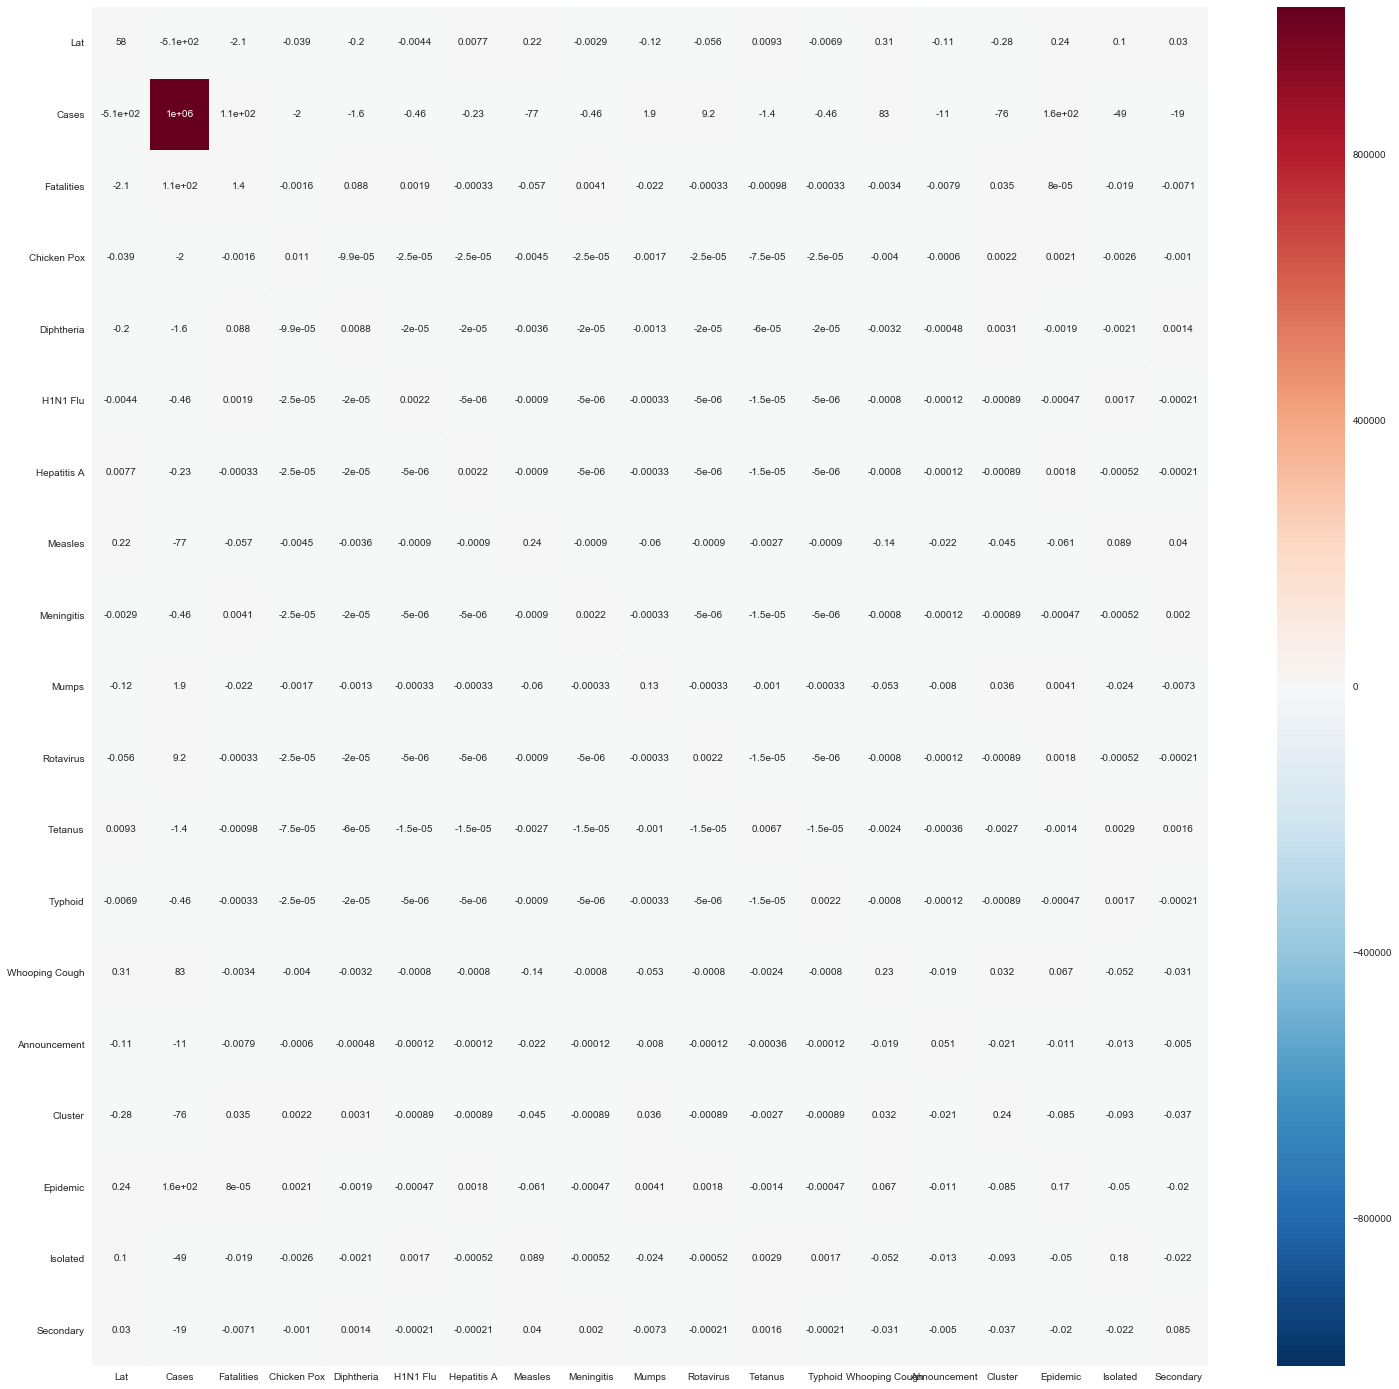

In [47]:
plt.figure(figsize = (25,25))
sns.heatmap(df.cov(), annot=True)

In [338]:
Features = [col for col in df.columns if col is not 'Long' and 'Lat']
Features.remove('Lat')
Features.remove('Long')
Features

[u'Outbreak',
 u'Location',
 u'Continent',
 u'Date',
 u'Year',
 u'Cases',
 u'Fatalities',
 u'Impact Scale',
 u'Chicken Pox',
 u'Diphtheria',
 u'H1N1 Flu',
 u'Hepatitis A',
 u'Measles',
 u'Meningitis',
 u'Mumps',
 u'Rotavirus',
 u'Tetanus',
 u'Typhoid',
 u'Whooping Cough',
 u'Announcement',
 u'Cluster',
 u'Epidemic',
 u'Isolated',
 u'Secondary']

In [339]:
diseases_na = ['Cases','Epidemic','Cluster','Announcement','Measles','Whooping Cough','Secondary','Mumps','Fatalities','Cases',
'Epidemic']

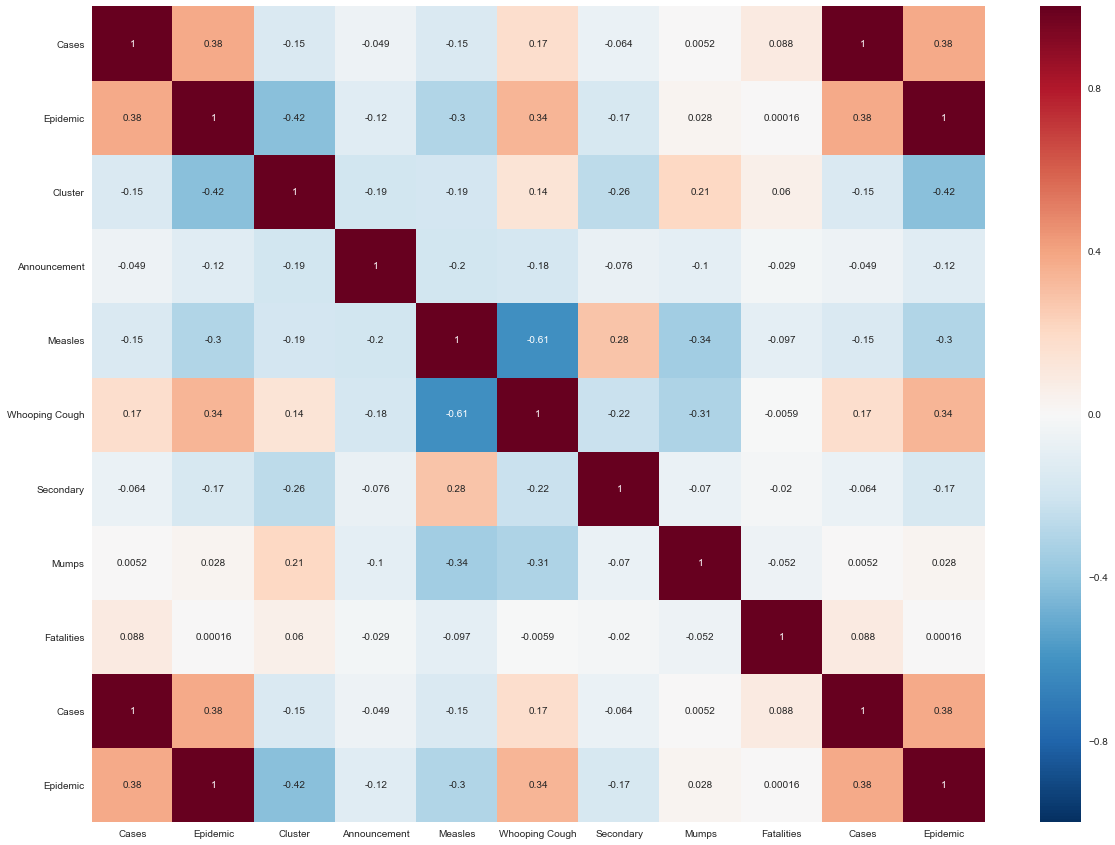

In [344]:
plt.figure(figsize=(20,15))
sns.heatmap(df[diseases_na].corr(), annot=True)

In [50]:
#north america done now going into europe same procedure as north america but no we are going to merge them together

In [51]:
df_eu = df_Vaccine_Preven_Map.loc[(df_Vaccine_Preven_Map['Continent']=='Europe'),:]
df_eu.reset_index(inplace=True)
df_eu.drop(['Source Citation', 'Source', 'index', 'Category'], inplace =  True, axis =1)
df_eu.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale
0,Measles,Austria (Styria),Europe,47.264901,14.89393,3/2009,2009,37,0,Secondary
1,Measles,Austria,Europe,47.070120,12.98584,11/2011-10/2012,2012,35,0,Cluster
2,Rubella,Austria,Europe,48.180740,15.46875,11/2011-10/2012,2012,10,0,Isolated
3,Diphtheria,Austria,Europe,48.180740,15.46875,1/2017,2017,1,0,Secondary
4,Measles,Austria,Europe,48.180740,15.46875,1/2017,2017,78,0,Cluster


In [57]:
df_eu['Outbreak'].value_counts()

Measles               169
Mumps                  30
Announcement           15
Rubella                12
Diphtheria              8
Whooping Cough          7
Measles\n               7
Polio                   5
Mumps\n                 4
Typhoid                 4
Tetanus                 2
Chicken Pox             2
Meningitis              2
Measles                 1
Streptococcus suis      1
Diptherina              1
Measles                 1
Violence                1
Name: Outbreak, dtype: int64

In [167]:
df_eu.groupby('Outbreak').describe()

Cases                                                    \
                    count         mean           std    min     25%     50%   
Outbreak                                                                      
Announcement         15.0     0.066667      0.258199    0.0    0.00     0.0   
Chicken Pox           2.0  1152.000000   1629.174024    0.0  576.00  1152.0   
Diphtheria            8.0     5.000000      8.960230    1.0    1.00     1.5   
Diptherina            1.0     2.000000           NaN    2.0    2.00     2.0   
Measles             177.0   616.536723   1788.682784    0.0   12.00    46.0   
Meningitis            2.0     6.000000      5.656854    2.0    4.00     6.0   
Mumps                34.0   647.617647   2798.412256    3.0   23.25    63.5   
Polio                 5.0    10.200000      9.984989    1.0    2.00     7.0   
Rubella              12.0  5861.583333  12570.667773   10.0   16.75    54.5   
Streptococcus suis    1.0   930.000000           NaN  930.0  930.00   930.0   
Tetanus               2.0     1.000000      0.000000    1.0    1.00     1.0   
Typhoid               4.0    38.750000     39.626380    6.0    8.25    29.5   
Violence              1.0     4.000000           NaN    4.0    4.00     4.0   
Whooping Cough        7.0  3067.142857   4659.405771    4.0  115.00  1080.0   

                                     Fatalities                           \
                        75%      max      count      mean       std  min   
Outbreak                                                                   
Announcement           0.00      1.0       15.0  0.066667  0.258199  0.0   
Chicken Pox         1728.00   2304.0        2.0  0.000000  0.000000  0.0   
Diphtheria             3.25     27.0        8.0  0.125000  0.353553  0.0   
Diptherina             2.00      2.0        1.0  0.000000       NaN  0.0   
Measles              250.00  14949.0      177.0  0.225989  2.265051  0.0   
Meningitis             8.00     10.0        2.0  0.500000  0.707107  0.0   
Mumps                149.50  16352.0       34.0  0.000000  0.000000  0.0   
Polio                 17.00     24.0        5.0  0.000000  0.000000  0.0   
Rubella             2320.50  39122.0       12.0  0.000000  0.000000  0.0   
Streptococcus suis   930.00    930.0        1.0  0.000000       NaN  0.0   
Tetanus                1.00      1.0        2.0  0.000000  0.000000  0.0   
Typhoid               60.00     90.0        4.0  0.000000  0.000000  0.0   
Violence               4.00      4.0        1.0  4.000000       NaN  4.0   
Whooping Cough      3644.00  12868.0        7.0  1.142857  2.035401  0.0   

                                             Lat                        \
                     25%  50%   75%   max  count       mean        std   
Outbreak                                                                 
Announcement        0.00  0.0  0.00   1.0   15.0  45.158220   5.808740   
Chicken Pox         0.00  0.0  0.00   0.0    2.0  53.490080   1.604538   
Diphtheria          0.00  0.0  0.00   1.0    8.0  52.180974   5.757396   
Diptherina          0.00  0.0  0.00   0.0    1.0  53.142367        NaN   
Measles             0.00  0.0  0.00  30.0  177.0  49.305321   8.321191   
Meningitis          0.25  0.5  0.75   1.0    2.0  50.174313   6.400302   
Mumps               0.00  0.0  0.00   0.0   34.0  50.891962   4.744618   
Polio               0.00  0.0  0.00   0.0    5.0  43.386826  11.606501   
Rubella             0.00  0.0  0.00   0.0   12.0  49.393646   5.660150   
Streptococcus suis  0.00  0.0  0.00   0.0    1.0  55.755786        NaN   
Tetanus             0.00  0.0  0.00   0.0    2.0  42.930581   4.277146   
Typhoid             0.00  0.0  0.00   0.0    4.0  34.196743   1.450274   
Violence            4.00  4.0  4.00   4.0    1.0  34.815852        NaN   
Whooping Cough      0.00  0.0  1.50   5.0    7.0  49.345202   6.075585   

                                                                           
                          min        25%        

In [69]:
df_eu['Outbreak'].replace('Measles ','Measles', inplace=True)
df_eu['Outbreak'].replace('Measles ','Measles', inplace=True)
df_eu['Outbreak'].replace("Mumps\n",'Mumps', inplace=True)
df_eu['Outbreak'].replace("Measles\n",'Measles', inplace=True)

In [166]:
df_eu.loc[df_eu['Cases']==1049,'Outbreak'] = 'Measles'
    

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [74]:
df_eu.loc[df_eu['Outbreak']=='Measles',:]

,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale
0,Measles,Austria (Styria),Europe,47.264901,14.89393,3/2009,2009,37,0,Secondary
1,Measles,Austria,Europe,47.070120,12.98584,11/2011-10/2012,2012,35,0,Cluster
4,Measles,Austria,Europe,48.180740,15.46875,1/2017,2017,78,0,Cluster
5,Measles,Belarus,Europe,54.521280,26.94629,2/2015,2015,1,0,Isolated
6,Measles,Belgium,Europe,50.503887,4.469936,1/2011-12/2011,2011,192,0,Epidemic
7,Measles,Belgium,Europe,50.545290,4.30801,11/2011-10/2012,2012,56,0,Epidemic
9,Measles,Belgium (Wallonia),Europe,51.219450,4.40246,4/2017,2017,288,0,Epidemic
10,Measles,Bosnia,Europe,43.739350,18.3252,5/2009,2009,161,0,Epidemic
11,Measles,Bosnia,Europe,43.915890,17.67908,1/2014-12/2014,2014,4829,0,Epidemic
12,Measles,Bulgaria\n,Europe,42.733883,25.48583,4/2009-11/2009,2009,958,0,Epidemic


In [137]:
df_eu['Outbreak'].value_counts()[14:]
    

Measles     1
Name: Outbreak, dtype: int64

In [87]:
df_eu.nsmallest(10, 'Cases')

,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale
58,Announcement,Germany,Europe,50.895238,10.524902,6/2017,2017,0,0,Announcement
79,Announcement,Italy,Europe,42.790866,12.447510,6/2017,2017,0,0,Announcement
81,Announcement,Italy,Europe,42.903634,12.469482,6/2017,2017,0,0,Announcement
106,Announcement,Romania,Europe,45.943161,24.96676,12/2016,2016,0,0,Announcement
119,Measles,Russia,Europe,62.187300,92.66251,1/2014-12/2014,2011,0,0,Epidemic
180,Announcement,Switzerland (Geneva),Europe,46.204391,6.143158,11/2016,2016,0,0,Announcement
183,Announcement,Switzerland (Geneva),Europe,46.204391,6.143158,4/2017,2017,0,0,Announcement
189,Announcement,Syria (Idlib),Europe,35.933333,36.633333,9/2014,2014,0,0,Announcement
193,Announcement,Syria,Europe,34.802075,38.996815,8/2016,2016,0,0,Announcement
196,Announcement,Syria,Europe,35.328761,40.135159,6/2017,2017,0,0,Announcement


In [103]:
df_eu.drop([119], axis=0, inplace=True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
df_Vaccine_Preven_Map.loc[(df_Vaccine_Preven_Map['Continent']=='Europe')&(df_Vaccine_Preven_Map['Location']=='Russia'),]

,Category,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale,Source Citation,Source
939,Polio,Polio,Russia,Europe,61.52401,105.318756,6/2010,2010,7,0,Secondary,"Radio Free Europe/Radio Liberty. ""Russia Confi...",http://www.rferl.org/content/Russia_Confirms_F...
947,Measles,Measles,Russia,Europe,62.18730,92.66251,1/2014-12/2014,2011,0,0,Epidemic,"World Health Organization. ""WHO/Europe calls f...",http://www.euro.who.int/en/media-centre/sectio...
948,Measles,Measles,Russia,Europe,48.70001,44.51667,2/2012,2012,100,1,Epidemic,"LifeNews. ""A measles outbreak in southern Russ...",http://www.lifenews.ru/news/81474


In [95]:
df_Vaccine_Preven_Map.iloc[947,-1]

u'http://www.euro.who.int/en/media-centre/sections/press-releases/2015/whoeurope-calls-for-scaled-up-vaccination-against-measles'

In [ ]:
#http://www.euro.who.int/en/media-centre/sections/press-releases/2015/02/whoeurope-calls-for-scaled-up-vaccination-against-measles

In [ ]:
#this report is just a yearly report of 2014-2015 in general yearly report it has nothign to do with realy cases and it encompasses 
#old soviet countries
#row is considered dropped since the information is not relevant to the source


In [168]:
df_eu

,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale
0,Measles,Austria (Styria),Europe,47.264901,14.89393,3/2009,2009,37,0,Secondary
1,Measles,Austria,Europe,47.070120,12.98584,11/2011-10/2012,2012,35,0,Cluster
2,Rubella,Austria,Europe,48.180740,15.46875,11/2011-10/2012,2012,10,0,Isolated
3,Diphtheria,Austria,Europe,48.180740,15.46875,1/2017,2017,1,0,Secondary
4,Measles,Austria,Europe,48.180740,15.46875,1/2017,2017,78,0,Cluster
5,Measles,Belarus,Europe,54.521280,26.94629,2/2015,2015,1,0,Isolated
6,Measles,Belgium,Europe,50.503887,4.469936,1/2011-12/2011,2011,192,0,Epidemic
7,Measles,Belgium,Europe,50.545290,4.30801,11/2011-10/2012,2012,56,0,Epidemic
8,Diphtheria,Belgium,Europe,51.219450,4.40246,3/2016,2016,1,1,Isolated
9,Measles,Belgium (Wallonia),Europe,51.219450,4.40246,4/2017,2017,288,0,Epidemic


In [171]:
df_eu.dtypes

Outbreak         object
Location         object
Continent        object
Lat             float64
Long             object
Date             object
Year             object
Cases             int64
Fatalities        int64
Impact Scale     object
dtype: object

In [180]:
df_eu.loc[df_eu['Long']=='-3/16017','Long'] = '-3.16017'
#long at 167 has value of -3/16017 value after doing research the / was a mistype and was inputed instead of a .

In [181]:
df_eu['Long'].astype(float)

0       14.893930
1       12.985840
2       15.468750
3       15.468750
4       15.468750
5       26.946290
6        4.469936
7        4.308010
8        4.402460
9        4.402460
10      18.325200
11      17.679080
12      25.485830
13      24.485830
14      24.900510
15      25.922240
16      23.225729
17      24.333566
18      24.745290
19      15.200000
20      33.429860
21      15.472960
22      18.233264
23       9.501790
24       9.501780
25       9.501785
26       9.501785
27       9.501790
28      -1.829830
29      -1.174320
30      -1.829830
31      -3.999460
32      25.013610
33      25.748150
34      24.067500
35       3.214530
36      -0.219730
37       7.441620
38       1.858690
39       2.213749
40      55.536384
41      45.718750
42      43.356890
43      44.783330
44       9.993680
45      10.451526
46      11.497889
47      13.411400
48       8.680615
49      10.761110
50      11.497890
51      13.406090
52       6.734910
53       8.400000
54      10.451530
55      13

In [183]:
df_eu['Impact Scale'].value_counts()

Epidemic        122
Cluster          97
Isolated         21
Announcement     17
Secondary        12
Isolated          1
Name: Impact Scale, dtype: int64

In [189]:
df_eu.loc[df_eu['Impact Scale'].isnull()==True,:]

,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale
188,Violence,Syria,Europe,34.815852,39.0464523,1/2014,2014,4,4,NaN


In [190]:
df_eu.groupby('Impact Scale').describe()

Cases                                                       \
              count         mean          std  min   25%    50%      75%   
Impact Scale                                                               
Announcement   17.0     0.058824     0.242536  0.0   0.0    0.0     0.00   
Cluster        97.0    37.123711    63.693645  2.0   9.0   18.0    35.00   
Epidemic      122.0  1825.114754  4852.348788  2.0  70.0  210.5  1072.25   
Isolated       21.0     2.952381     4.128876  1.0   1.0    1.0     2.00   
Isolated        1.0     1.000000          NaN  1.0   1.0    1.0     1.00   
Secondary      12.0    10.250000    11.005164  1.0   3.0    6.0    12.25   

                      Fatalities                                          \
                  max      count      mean       std  min  25%  50%  75%   
Impact Scale                                                               
Announcement      1.0       17.0  0.058824  0.242536  0.0  0.0  0.0  0.0   
Cluster         450.0       97.0  0.020619  0.142842  0.0  0.0  0.0  0.0   
Epidemic      39122.0      122.0  0.385246  2.767720  0.0  0.0  0.0  0.0   
Isolated         16.0       21.0  0.047619  0.218218  0.0  0.0  0.0  0.0   
Isolated          1.0        1.0  0.000000       NaN  0.0  0.0  0.0  0.0   
Secondary        37.0       12.0  0.000000  0.000000  0.0  0.0  0.0  0.0   

                      Lat                                             \
               max  count       mean       std        min        25%   
Impact Scale                                                           
Announcement   1.0   17.0  45.983842  5.912673  34.802075  42.903634   
Cluster        1.0   97.0  50.241155  9.859238 -21.115141  47.162494   
Epidemic      30.0  122.0  48.524355  6.086316  33.470217  43.403876   
Isolated       1.0   21.0  47.012584  7.369191  35.126410  41.591160   
Isolated       0.0    1.0  56.263920       NaN  56.263920  56.263920   
Secondary      0.0   12.0  52.293502  6.140657  41.385064  47.951780   

                                              
                    50%        75%       max  
Impact Scale                                  
Announcement  46.204391  50.895238  52.35550  
Cluster       51.746770  55.174530  68.99307  
Epidemic      50.476993  52.628470  60.94312  
Isolated      45.954980  53.270700  60.25117  
Isolated      56.263920  56.263920  56.26392  
Secondary     51.759591  56.206983  61.92411

In [198]:
df_eu.iloc[27,-1] = 'Isolated'

In [207]:
df_eu['Long']= df_eu['Long'].astype(float, inplace=True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [208]:
df_eu.dtypes

Outbreak         object
Location         object
Continent        object
Lat             float64
Long            float64
Date             object
Year             object
Cases             int64
Fatalities        int64
Impact Scale     object
dtype: object

In [209]:
df_eu.describe()

,Lat,Long,Cases,Fatalities
count,271.000000,271.000000,271.000000,271.000000
mean,49.007213,15.394936,835.630996,0.202952
std,7.858197,21.421375,3370.163155,1.879556
min,-21.115141,-9.060460,0.000000,0.000000
25%,44.366670,-1.748124,6.500000,0.000000
50%,51.089520,9.750000,37.000000,0.000000
75%,53.386110,25.750050,188.500000,0.000000
max,68.993070,127.480172,39122.000000,30.000000


In [212]:
diseases

['Announcement', 'Tetanus', 'Chicken Pox', 'Measles', 'Mumps', 'Rotavirus']

In [230]:
df_eu_real =  df_eu
df_eu.head()

,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale
0,Measles,Austria (Styria),Europe,47.264901,14.89393,3/2009,2009,37,0,Secondary
1,Measles,Austria,Europe,47.070120,12.98584,11/2011-10/2012,2012,35,0,Cluster
2,Rubella,Austria,Europe,48.180740,15.46875,11/2011-10/2012,2012,10,0,Isolated
3,Diphtheria,Austria,Europe,48.180740,15.46875,1/2017,2017,1,0,Secondary
4,Measles,Austria,Europe,48.180740,15.46875,1/2017,2017,78,0,Cluster


In [255]:
eu_impact_dummies = pd.get_dummies(df_eu_real['Impact Scale'])
eu_outbreak_dumimes = pd.get_dummies(df_eu_real['Outbreak'])

In [303]:
df_europe = pd.concat([df_eu_real,eu_impact_dummies,eu_outbreak_dumimes], axis =1)

In [299]:
eu_impact_dummies.head

,Announcement,Cluster,Epidemic,Isolated,Secondary
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,1,0,0,0


In [302]:
eu_outbreak_dumimes.drop(['Announcement'], axis =1 , inplace =True)

In [257]:
df_europe.head()

,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale,Announcement,Cluster,Epidemic,Isolated,Secondary,Announcement,Chicken Pox,Diphtheria,Diptherina,Measles,Meningitis,Mumps,Polio,Rubella,Streptococcus suis,Tetanus,Typhoid,Violence,Whooping Cough
0,Measles,Austria (Styria),Europe,47.264901,14.89393,3/2009,2009,37,0,Secondary,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Measles,Austria,Europe,47.070120,12.98584,11/2011-10/2012,2012,35,0,Cluster,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Rubella,Austria,Europe,48.180740,15.46875,11/2011-10/2012,2012,10,0,Isolated,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Diphtheria,Austria,Europe,48.180740,15.46875,1/2017,2017,1,0,Secondary,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Measles,Austria,Europe,48.180740,15.46875,1/2017,2017,78,0,Cluster,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [251]:
df_europe.describe()

,Lat,Long,Cases,Fatalities,Announcement,Cluster,Epidemic,Isolated,Secondary,Announcement,Chicken Pox,Diphtheria,Diptherina,Measles,Meningitis,Mumps,Polio,Rubella,Streptococcus suis,Tetanus,Typhoid,Violence,Whooping Cough
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,49.007213,15.394936,835.630996,0.202952,0.062731,0.357934,0.450185,0.081181,0.044280,0.055351,0.007380,0.029520,0.003690,0.653137,0.007380,0.125461,0.018450,0.044280,0.003690,0.007380,0.014760,0.003690,0.025830
std,7.858197,21.421375,3370.163155,1.879556,0.242926,0.480279,0.498433,0.273618,0.206098,0.229086,0.085748,0.169573,0.060746,0.476852,0.085748,0.331854,0.134822,0.206098,0.060746,0.085748,0.120815,0.060746,0.158922
min,-21.115141,-9.060460,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.366670,-1.748124,6.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.089520,9.750000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.386110,25.750050,188.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,68.993070,127.480172,39122.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [252]:
#dropping violence since its not a disease

In [304]:
df_europe.drop(['Violence'],axis=1, inplace = True)
df_europe.head()

,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale,Announcement,Cluster,Epidemic,Isolated,Secondary,Chicken Pox,Diphtheria,Diptherina,Measles,Meningitis,Mumps,Polio,Rubella,Streptococcus suis,Tetanus,Typhoid,Whooping Cough
0,Measles,Austria (Styria),Europe,47.264901,14.89393,3/2009,2009,37,0,Secondary,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,Measles,Austria,Europe,47.070120,12.98584,11/2011-10/2012,2012,35,0,Cluster,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Rubella,Austria,Europe,48.180740,15.46875,11/2011-10/2012,2012,10,0,Isolated,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Diphtheria,Austria,Europe,48.180740,15.46875,1/2017,2017,1,0,Secondary,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,Measles,Austria,Europe,48.180740,15.46875,1/2017,2017,78,0,Cluster,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [305]:
df_europe.loc[df_europe['Outbreak']=='Violence',:] #dropped checked

,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale,Announcement,Cluster,Epidemic,Isolated,Secondary,Chicken Pox,Diphtheria,Diptherina,Measles,Meningitis,Mumps,Polio,Rubella,Streptococcus suis,Tetanus,Typhoid,Whooping Cough
188,Violence,Syria,Europe,34.815852,39.046452,1/2014,2014,4,4,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [307]:
df_europe.drop([188], inplace = True)

In [308]:
df_europe.head()

,Outbreak,Location,Continent,Lat,Long,Date,Year,Cases,Fatalities,Impact Scale,Announcement,Cluster,Epidemic,Isolated,Secondary,Chicken Pox,Diphtheria,Diptherina,Measles,Meningitis,Mumps,Polio,Rubella,Streptococcus suis,Tetanus,Typhoid,Whooping Cough
0,Measles,Austria (Styria),Europe,47.264901,14.89393,3/2009,2009,37,0,Secondary,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,Measles,Austria,Europe,47.070120,12.98584,11/2011-10/2012,2012,35,0,Cluster,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Rubella,Austria,Europe,48.180740,15.46875,11/2011-10/2012,2012,10,0,Isolated,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Diphtheria,Austria,Europe,48.180740,15.46875,1/2017,2017,1,0,Secondary,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,Measles,Austria,Europe,48.180740,15.46875,1/2017,2017,78,0,Cluster,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [309]:
df_europe.describe()

,Lat,Long,Cases,Fatalities,Announcement,Cluster,Epidemic,Isolated,Secondary,Chicken Pox,Diphtheria,Diptherina,Measles,Meningitis,Mumps,Polio,Rubella,Streptococcus suis,Tetanus,Typhoid,Whooping Cough
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,49.059774,15.307338,838.711111,0.188889,0.062963,0.359259,0.451852,0.081481,0.044444,0.007407,0.029630,0.003704,0.655556,0.007407,0.125926,0.018519,0.044444,0.003704,0.007407,0.014815,0.025926
std,7.824920,21.412471,3376.039422,1.868708,0.243347,0.480674,0.498601,0.274081,0.206463,0.085906,0.169878,0.060858,0.476069,0.085906,0.332382,0.135067,0.206463,0.060858,0.085906,0.121036,0.159209
min,-21.115141,-9.060460,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.422620,-1.784152,7.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.127605,9.750000,37.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.399510,25.682570,190.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,68.993070,127.480172,39122.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [310]:
df_europe.corr()

,Lat,Long,Cases,Fatalities,Announcement,Cluster,Epidemic,Isolated,Secondary,Chicken Pox,Diphtheria,Diptherina,Measles,Meningitis,Mumps,Polio,Rubella,Streptococcus suis,Tetanus,Typhoid,Whooping Cough
Lat,1.000000,-0.074008,-0.043016,-0.038218,-0.102086,0.113261,-0.062240,-0.062031,0.089292,0.049001,0.069830,0.031870,0.043372,0.012327,0.089039,-0.099769,0.009219,0.052272,-0.067792,-0.233358,0.005962
Long,-0.074008,1.000000,0.028453,0.000201,-0.009797,0.012005,-0.058235,0.001983,0.121601,0.016066,-0.039495,-0.065611,0.156071,0.031610,-0.280072,0.219983,-0.024632,0.063646,-0.016930,0.122221,-0.127683
Cases,-0.043016,0.028453,1.000000,0.115552,-0.064513,-0.178120,0.265768,-0.073877,-0.053021,0.008031,-0.043232,-0.015139,-0.090957,-0.021347,-0.021524,-0.033772,0.321463,0.001652,-0.021475,-0.029111,0.107887
Fatalities,-0.038218,0.000201,0.115552,1.000000,-0.018075,-0.067551,0.095578,-0.022904,-0.021840,-0.008748,-0.005985,-0.006174,0.027440,0.014409,-0.038437,-0.013910,-0.021840,-0.006174,-0.008748,-0.012418,0.083439
Announcement,-0.102086,-0.009797,-0.064513,-0.018075,1.000000,-0.194101,-0.235349,-0.077206,-0.055904,0.155434,-0.045296,-0.015805,-0.325521,-0.022393,-0.098389,-0.035606,-0.055904,-0.015805,-0.022393,-0.031787,-0.042290
Cluster,0.113261,0.012005,-0.178120,-0.067551,-0.194101,1.000000,-0.679848,-0.223022,-0.161489,-0.064686,0.005733,0.081426,0.039169,0.115368,-0.004998,0.011664,0.063264,-0.045655,-0.064686,0.099869,-0.025008
Epidemic,-0.062240,-0.058235,0.265768,0.095578,-0.235349,-0.679848,1.000000,-0.270417,-0.195808,0.008358,-0.158651,-0.055357,0.156960,-0.078433,0.104016,-0.069512,-0.051359,0.067154,-0.078433,-0.049736,0.039199
Isolated,-0.062031,0.001983,-0.073877,-0.022904,-0.077206,-0.223022,-0.270417,1.000000,-0.064234,-0.025730,0.187481,-0.018160,-0.069010,-0.025730,-0.072243,0.059508,0.067154,-0.018160,0.290043,-0.036524,0.036601
Secondary,0.089292,0.121601,-0.053021,-0.021840,-0.055904,-0.161489,-0.195808,-0.064234,1.000000,-0.018631,0.174296,-0.013149,0.005043,-0.018631,-0.027687,0.103684,-0.046512,-0.013149,-0.018631,-0.026447,-0.035185
Chicken Pox,0.049001,0.016066,0.008031,-0.008748,0.155434,-0.064686,0.008358,-0.025730,-0.018631,1.000000,-0.015095,-0.005267,-0.119177,-0.007463,-0.032789,-0.011866,-0.018631,-0.005267,-0.007463,-0.010593,-0.014093


In [333]:

Features_eu = [x for x in df_europe.columns]
Features_eu.remove('Long')
Features_eu.remove('Lat')


diseases_europe = ['Measles','Mumps','Rubella','Tetanus','Whooping Cough','Fatalities','Cases','Cluster','Epidemic','Secondary','Announcement']

In [312]:
df_europe[Features_eu].corr()

,Cases,Fatalities,Announcement,Cluster,Epidemic,Isolated,Secondary,Chicken Pox,Diphtheria,Diptherina,Measles,Meningitis,Mumps,Polio,Rubella,Streptococcus suis,Tetanus,Typhoid,Whooping Cough
Cases,1.000000,0.115552,-0.064513,-0.178120,0.265768,-0.073877,-0.053021,0.008031,-0.043232,-0.015139,-0.090957,-0.021347,-0.021524,-0.033772,0.321463,0.001652,-0.021475,-0.029111,0.107887
Fatalities,0.115552,1.000000,-0.018075,-0.067551,0.095578,-0.022904,-0.021840,-0.008748,-0.005985,-0.006174,0.027440,0.014409,-0.038437,-0.013910,-0.021840,-0.006174,-0.008748,-0.012418,0.083439
Announcement,-0.064513,-0.018075,1.000000,-0.194101,-0.235349,-0.077206,-0.055904,0.155434,-0.045296,-0.015805,-0.325521,-0.022393,-0.098389,-0.035606,-0.055904,-0.015805,-0.022393,-0.031787,-0.042290
Cluster,-0.178120,-0.067551,-0.194101,1.000000,-0.679848,-0.223022,-0.161489,-0.064686,0.005733,0.081426,0.039169,0.115368,-0.004998,0.011664,0.063264,-0.045655,-0.064686,0.099869,-0.025008
Epidemic,0.265768,0.095578,-0.235349,-0.679848,1.000000,-0.270417,-0.195808,0.008358,-0.158651,-0.055357,0.156960,-0.078433,0.104016,-0.069512,-0.051359,0.067154,-0.078433,-0.049736,0.039199
Isolated,-0.073877,-0.022904,-0.077206,-0.223022,-0.270417,1.000000,-0.064234,-0.025730,0.187481,-0.018160,-0.069010,-0.025730,-0.072243,0.059508,0.067154,-0.018160,0.290043,-0.036524,0.036601
Secondary,-0.053021,-0.021840,-0.055904,-0.161489,-0.195808,-0.064234,1.000000,-0.018631,0.174296,-0.013149,0.005043,-0.018631,-0.027687,0.103684,-0.046512,-0.013149,-0.018631,-0.026447,-0.035185
Chicken Pox,0.008031,-0.008748,0.155434,-0.064686,0.008358,-0.025730,-0.018631,1.000000,-0.015095,-0.005267,-0.119177,-0.007463,-0.032789,-0.011866,-0.018631,-0.005267,-0.007463,-0.010593,-0.014093
Diphtheria,-0.043232,-0.005985,-0.045296,0.005733,-0.158651,0.187481,0.174296,-0.015095,1.000000,-0.010654,-0.241068,-0.015095,-0.066325,-0.024002,-0.037686,-0.010654,-0.015095,-0.021428,-0.028508
Diptherina,-0.015139,-0.006174,-0.015805,0.081426,-0.055357,-0.018160,-0.013149,-0.005267,-0.010654,1.000000,-0.084114,-0.005267,-0.023142,-0.008375,-0.013149,-0.003717,-0.005267,-0.007477,-0.009947


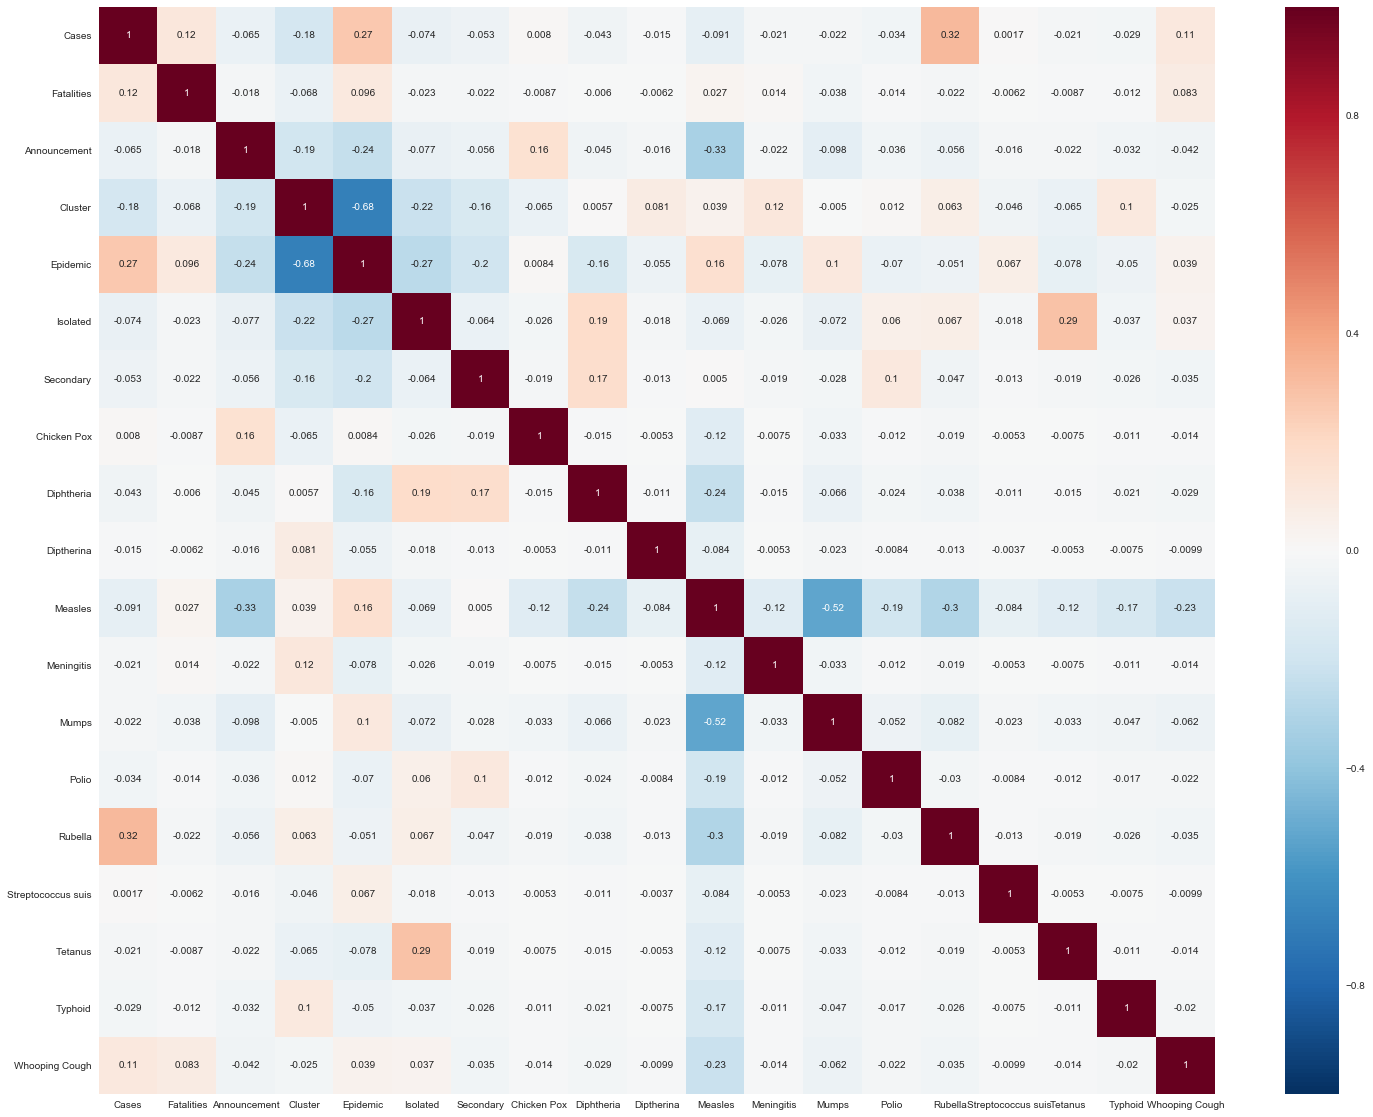

In [317]:
plt.figure(figsize=(25,20))
sns.heatmap(df_europe[Features_eu].corr(), annot=True)

In [ ]:
#removed announcements from outbreak since its not a outbreak and its more of a impact scale than outbreak

In [320]:
#cases to test for the pairplot and heatmap
diseases_europe

['Measles', 'Mumps', 'Rubella', 'Tetanus', 'Whooping Cough']

In [326]:
df_europe[diseases_europe].describe()

,Measles,Mumps,Rubella,Tetanus,Whooping Cough,Fatalities,Cases,Cluster,Epidemic,Secondary
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,0.655556,0.125926,0.044444,0.007407,0.025926,0.188889,838.711111,0.359259,0.451852,0.044444
std,0.476069,0.332382,0.206463,0.085906,0.159209,1.868708,3376.039422,0.480674,0.498601,0.206463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.250000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.500000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.250000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,39122.000000,1.000000,1.000000,1.000000


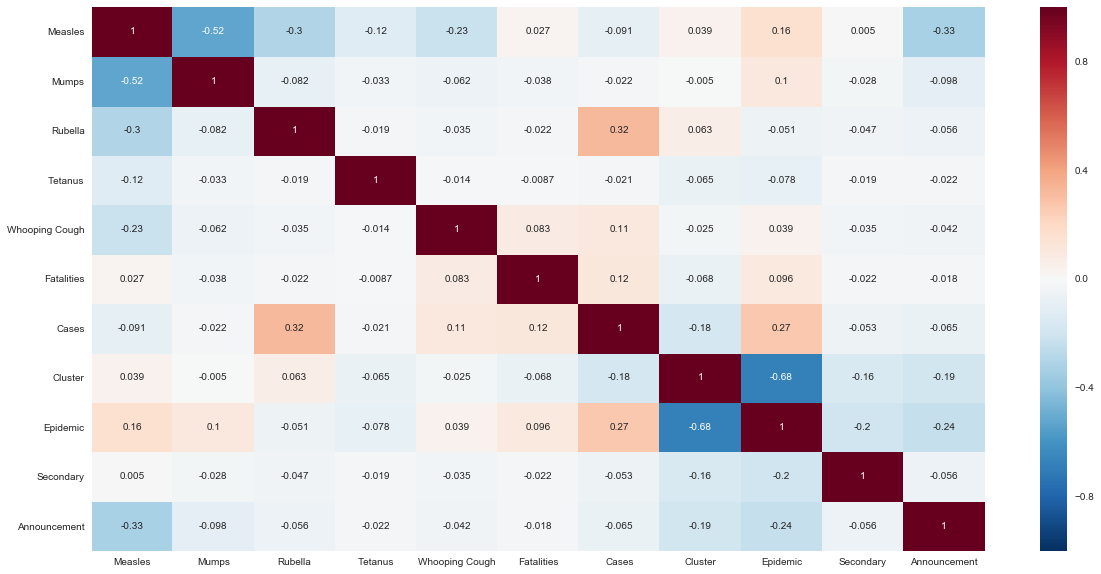

In [346]:
plt.figure(figsize=(20,10))

sns.heatmap(df_europe[diseases_europe].corr(), annot=True)
#europe

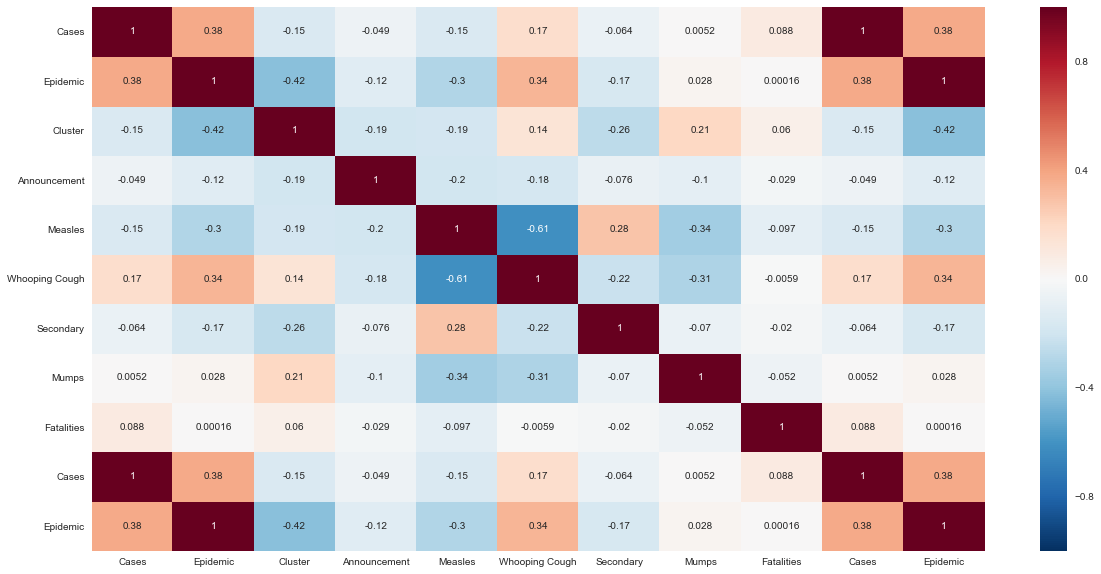

In [347]:
plt.figure(figsize=(20,10))
sns.heatmap(df[diseases_na].corr(), annot=True)
#NA 

In [356]:
df.to_csv('./datasets/na_pvd')

In [355]:
df_europe.to_csv('./datasets/europe_pvd', encoding='utf-8')